## !!!WORK IN PROGRESS &mdash; TESTING ANIMATIONS!!!

<img src="images/logo/selene-logo-640.png" style="max-height:75px;" alt="SELENE Logo" />

**Disclaimer:** This Jupyter Notebook contains content generated with the assistance of AI. While every effort has been made to review and validate the outputs, users should independently verify critical information before relying on it. The SELENE notebook repository is constantly evolving. We recommend downloading or pulling the latest version of this notebook from Github.

# Gradient Descent &mdash; The Very Basics

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function by repeatedly taking steps in the direction of the steepest decrease of that function. In the context of machine learning, this function is typically a **loss function** that measures how well a model's predictions match the data. By computing the gradient of the loss with respect to the model parameters, Gradient Descent tells us *how* and *in which direction* to adjust those parameters to reduce error. Conceptually, it can be thought of as navigating a landscape of error values, moving downhill step by step until a (local) minimum is reached.

The general purpose of Gradient Descent is therefore **parameter optimization**. Most machine learning models (from linear regression to deep neural networks) are defined by a set of parameters (weights and biases) that determine their behavior. These parameters are not chosen analytically in closed form for complex models; instead, they are learned from data. Gradient Descent provides a systematic, scalable way to tune millions (or even billions) of parameters by relying only on local information: the gradient at the current point.

Gradient Descent has become a cornerstone of machine learning and neural networks because it scales extremely well to high-dimensional problems and works hand-in-hand with **backpropagation**. Backpropagation efficiently computes gradients of the loss with respect to all parameters in a neural network, and Gradient Descent uses those gradients to update the parameters. This separation of concerns &mdash; gradient computation on one side, optimization on the other &mdash; makes the training of deep models both conceptually clean and computationally feasible.

We need Gradient Descent because, for most realistic models, there is no direct mathematical solution for finding the optimal parameters. The loss surfaces of neural networks are highly non-linear, high-dimensional, and often non-convex. Gradient Descent offers a practical and flexible approach to navigating these complex landscapes, allowing models to improve gradually through incremental updates. Understanding Gradient Descent at a fundamental level is therefore essential: it reveals *how* learning actually happens inside a model and provides the foundation for more advanced optimization methods used in modern machine learning.


### Setting up the Notebook

#### Make Required Imports

This notebook requires the import of different Python packages but also additional Python modules that are part of the repository. If a package is missing, use your preferred package manager (e.g., [conda](https://anaconda.org/anaconda/conda) or [pip](https://pypi.org/project/pip/)) to install it. If the code cell below runs with any errors, all required packages and modules have successfully been imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.utils.plotting.gd import *

---

## Motivation

### Why do we need Gradient Descent?

Let's assume we have a very simply function $f(x)$ which is define as:

$$\large
f(x) = x^2 - 4x + 5
$$

We can also define this function as a Python method:

In [2]:
def f(x):
    return x**2 - 4*x + 5

Using this method, we can plot the function

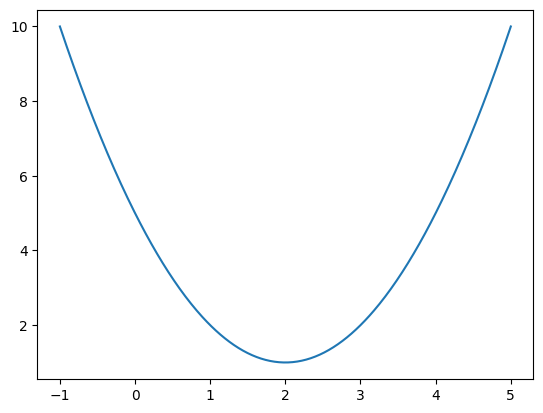

In [3]:
x = np.linspace(-1, 5, 400)
y = f(x)
plt.figure()
plt.plot(x, y)
plt.show()

If we now assume that $f(x)$ is some kind of loss function where we want to find the value for $x$ thar minimizes this function. Of course, given the simple nature of $f(x)$ and just by looking at the plot above, we can see that $x=2$ minimizes $f(x)$ with $f(2) = 1$. Beyond eye-balling the solution, the systematic approach to find the minimum is using calculus by means of the first derivative $\frac{df}{dx}$. If $g(x)$ denotes the first derivative of $f(x)$, and using the derivation rules from calculus, we get:

$$\large
g(x) = \frac{df(x)}{dx} = 2x - 4
$$

The first derivative tells us the **rate of change** of a function with respect to its input, including both the direction** and steepness of that change. Its sign indicates whether the function is increasing or decreasing, and points where it is zero identify **critical points** where the behavior of the function may change. Thus, to find $x$ that minimizes $f(x)$, we need to find $x$ where $g(x) = 0$. Again, given the very simple nature of $f(x)$ and thus $g(x)$, this is a very simple calculation.

$$
\begin{align}
\large 2x - 4\ &\large= 0\\[0.25em]
\large 2x\ &\large= 4\\[0.25em]
\large x\ &\large= 2
\end{align}
$$

Of course, we get the result that $x=2$ minimizes $f(x)$ as we spotted from the plot.

**Important:** The first derivative of a function allows us to identify critical points, where the slope is zero and the function has a horizontal tangent. These points are candidates for **local minima, local maxima, or saddle points**. However, the first derivative alone does not tell us which type of point we have found. To classify a critical point, we must perform an additional check—either by examining the second derivative (which reveals local curvature) or by evaluating the function slightly before and after the point to see whether the function value decreases, increases, or does both. In the context of **loss functions**, we typically do not need to explicitly distinguish between minima, maxima, and saddle points. This is because training is formulated as a **pure minimization problem**: we only ever move parameters in the direction that reduces the loss. Gradient-based optimization methods like Gradient Descent naturally move *away* from maxima and tend not to get stuck at saddle points in practice, especially in high-dimensional spaces where true saddle points are unstable. As a result, it is sufficient to follow the gradient and monitor whether the loss decreases, rather than classifying each stationary point mathematically.

Now that we have seen an example for how we can find the minimum of a function, you may wonder what the big deal is, and why we cannot train machine learning models &mdash; not even Linear Regression let alone large neural networks &mdash; that way. Our example was easy to solve because $g(x)$, i.e., the derivative of $f(x)$, was such a simple function that allowed us to set $g(x) = 0$ and solve for $x$. In other words, we could find an analytically solution in terms of a closed-form expression that allowed is to find $x$ that minimized $f(x)$ directly.

However, if $f(x)$ and particularly its first derivative, becomes more complex, this might no longer be possible. While we can still compute the derivative, and set the derivative to $0$, we fail to solve for $x$.

$$
\begin{align}
\large g(x)\ &\large = 0\\[0.25em]
\large\Downarrow\\[0.25em]
\large x\ &\large = {\color{red} \times} \\
\end{align}
$$

For most machine learning models (but especially neural networks), the loss function is highly non-linear, high-dimensional, and has millions of parameters, making such equations impossible to solve in closed form. 
In fact, basic Logistic Regression &mdash; which can crudely be considered a neural network with a single neuron &mdash; cannot be solve analytically. Additionally, real-world loss function are often **non-convex**, with many local minima and saddle points. Even if we could write down the equations, solving them exactly would be computationally intractable.

In [4]:
def df(x):
    return 2*x - 4

### Basic Idea

In [6]:
animate_gradient_descent(f, df, x0=-1)